In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import norm

In [2]:
df_test = pd.read_csv('test.csv')

In [3]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [4]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [5]:
df_test.duplicated().sum()

0

In [6]:
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

### Data Transformation

- **GrLivArea** data distribution.

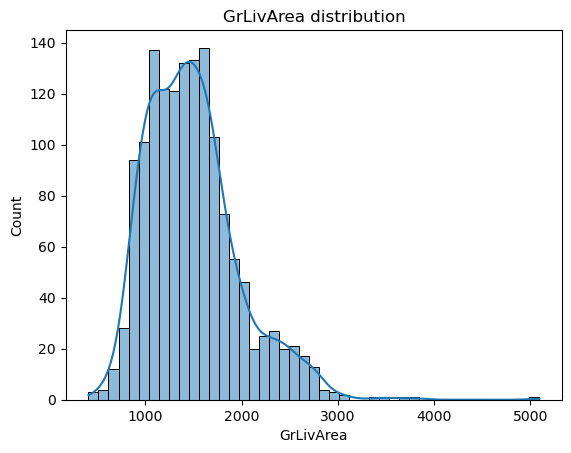

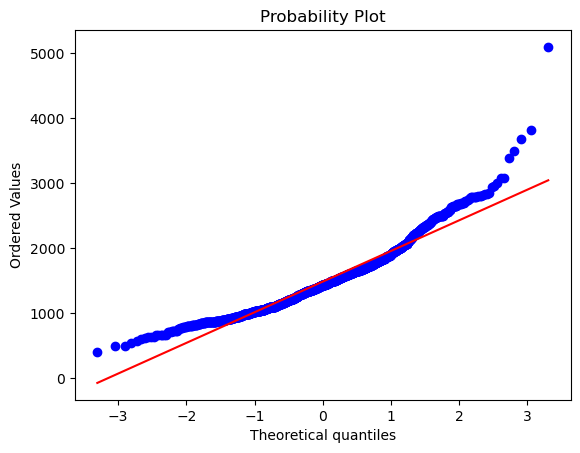

In [7]:
# GrLivArea
#sns.distplot(x = df_test['GrLivArea'], fit = norm)
sns.histplot(data = df_test, x = df_test['GrLivArea'], kde = True)
plt.title('GrLivArea distribution')
fig = plt.figure()
res = stats.probplot(df_test['GrLivArea'], plot = plt)

- **GrLivArea** after log1p transformation

C:\Users\HP\AppData\Local\Temp\ipykernel_26064\3698386400.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test['GrLivArea'], fit = norm)


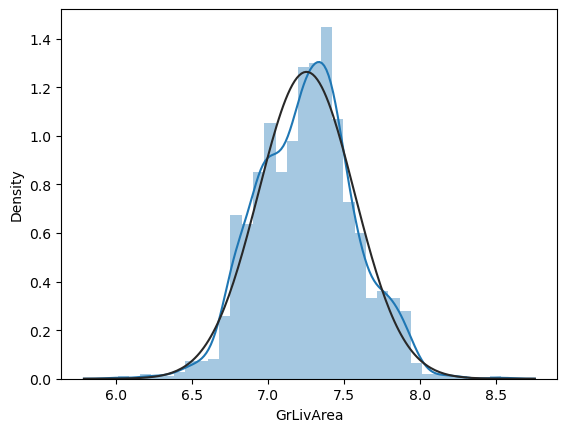

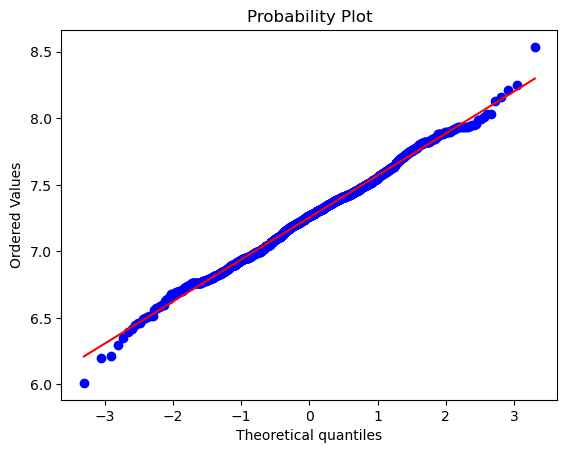

In [8]:
df_test['GrLivArea'] = np.log1p(df_test['GrLivArea'])
sns.distplot(df_test['GrLivArea'], fit = norm)
fig  =  plt.figure()
res =  stats.probplot(df_test['GrLivArea'], plot = plt)

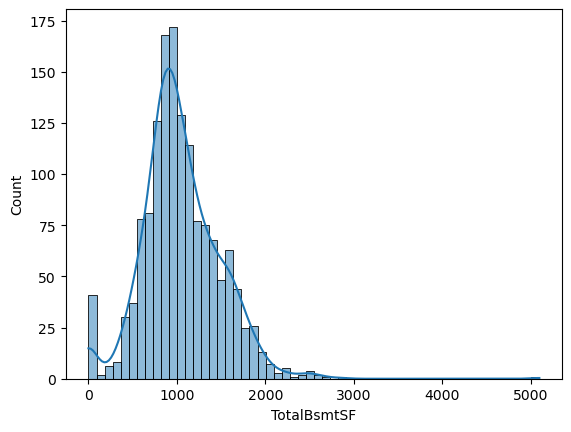

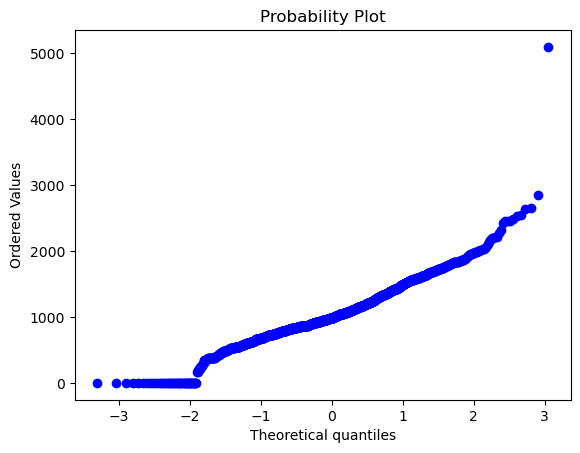

In [9]:
#TotalBsmtSF feature data distribution
sns.histplot(data=df_test,x=df_test['TotalBsmtSF'], kde = True)
fig = plt.figure()
res = stats.probplot(df_test['TotalBsmtSF'], plot = plt)

problem:
1. present skewness
2. significant number of observation with 0 values (house without basement)
3. zero value doesn't allow us do transformation.

solution:
1. create binary number (1: have basement, 0: no basement)

note:
_high risk feature engineering!_

In [10]:
df_test['HasBsmt'] = pd.Series(len(df_test['TotalBsmtSF']), index = df_test.index)
df_test['HasBsmt'] = 0
df_test.loc[df_test['TotalBsmtSF']>0, 'HasBsmt'] = 1

In [11]:
df_test.loc[df_test['HasBsmt'] == 1, 'TotalBsmtSF'] = np.log1p(df_test['TotalBsmtSF'])

C:\Users\HP\AppData\Local\Temp\ipykernel_26064\2962116722.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[df_test['TotalBsmtSF']>0]['TotalBsmtSF'], fit = norm)


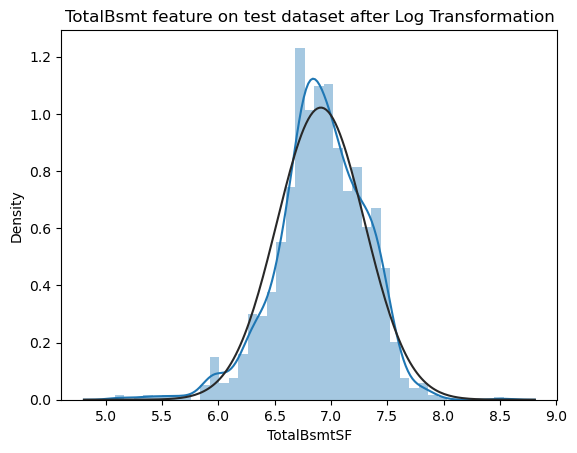

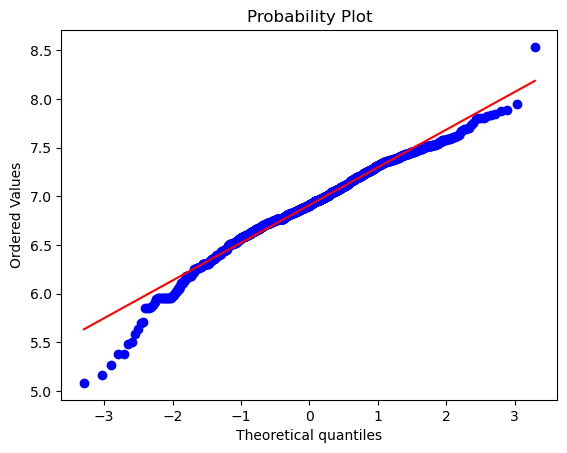

In [12]:
sns.distplot(df_test[df_test['TotalBsmtSF']>0]['TotalBsmtSF'], fit = norm)
plt.title('TotalBsmt feature on test dataset after Log Transformation')
fig = plt.figure()
res = stats.probplot(df_test[df_test['TotalBsmtSF']>0]['TotalBsmtSF'], plot = plt)

### Handle Missing Value

In [13]:
total = df_test.isnull().sum().sort_values(ascending = False)
percent = (df_test.isnull().sum()*100/df_test.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total,percent],axis =1, keys = ['Total Missing', 'Percent'])
missing_data.head()

,Total Missing,Percent
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
FireplaceQu,730,50.034270


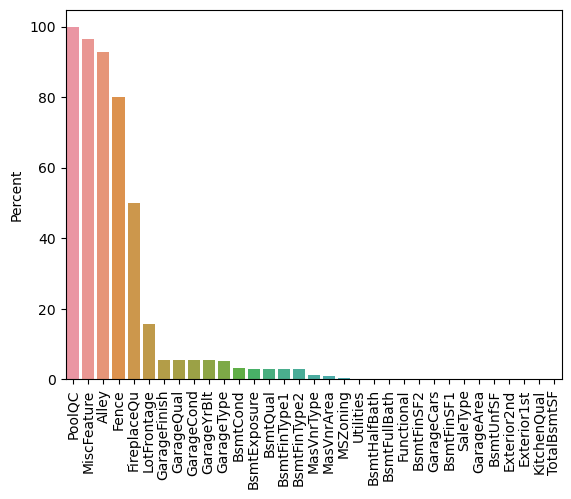

In [14]:
#create barplot of missing data
non_zero_missing = missing_data.drop(missing_data[missing_data['Percent']==0].index)
sns.barplot(data =  missing_data, x = non_zero_missing.index, y = non_zero_missing.Percent)
plt.xticks(rotation = 90)
plt.show()

In [15]:
#PoolQC
df_test.drop('PoolQC', axis = 1, inplace = True)

In [16]:
#MiscFeature
df_test.drop('MiscFeature', axis = 1,  inplace = True)

In [17]:
#Alley
df_test.drop('Alley', axis = 1, inplace = True)

In [18]:
#Fence
df_test.drop('Fence', axis= 1, inplace = True)

In [19]:
#FireplaceQU
df_test.drop('FireplaceQu', axis = 1, inplace = True)

In [20]:
#GarageX
garage_num = ['GarageYrBlt', 'GarageArea','GarageCars']
garage_obj = ['GarageFinish','GarageQual','GarageCond','GarageType']
for col_num in garage_num:
    df_test[col_num] = df_test[col_num].fillna(df_test[col_num].mean())
for col_obj in garage_obj:
    df_test[col_obj] = df_test[col_obj].fillna('None')

In [21]:
#BsmtX
BsmtX = ['BsmtCond','BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1',
           'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']

In [22]:
for col in BsmtX:
    if df_test[col].dtypes != 'object':
        df_test[col] = df_test[col].fillna(df_test[col].mean())
    else:
        df_test[col] = df_test[col].fillna('None')

- Some missing-value features had been handled. However, the **LotFrontage** feature is quite unique. This is one of the properties on house we had to pay attention. 

In [23]:
#LotFrontage 
df_test['LotFrontage'] = df_test.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

- The **MasVnrArea** do not have null value. However, do not be fooled, it has 0.0 value.

In [24]:
#MasVnrX
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(0)
df_test['MasVnrType'] = df_test['MasVnrType'].fillna('None')

In [25]:
percentage = (df_test.isnull().sum()*100/df_test.isnull().count()).sort_values(ascending=False)
total = df_test.isnull().sum().sort_values(ascending = False)
miss_table = pd.concat([total, percentage], axis =1, keys = ['Total','Percent'])
miss_table

,Total,Percent
MSZoning,4,0.27416
Functional,2,0.13708
Utilities,2,0.13708
Exterior2nd,1,0.06854
SaleType,1,0.06854
...,...,...
ExterCond,0,0.00000
ExterQual,0,0.00000
MasVnrArea,0,0.00000
MasVnrType,0,0.00000


### Encode the Data

In [26]:
#change several columns to string
df_test[['MSSubClass','YrSold','MoSold']] = df_test[['MSSubClass','YrSold','MoSold']].astype(str)

In [27]:
#use label encoder to encode object dtype
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for cols in df_test.columns:
    if df_test[cols].dtypes == 'object':
        le.fit(list(df_test[cols].values))
        df_test[cols] = le.transform(list(df_test[cols].values))
print(df_test.shape)

(1459, 76)


In [28]:
#something fishy, lets check columns
df_test.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'Pav

- We had addition feature in the data. We handle it later.

In [29]:
#adding feature
df_test['TotalF'] = df_test['TotalBsmtSF'] + df_test['1stFlrSF'] + df_test['2ndFlrSF']

In [30]:
#check skewness
from scipy.stats import skew
numeric = df_test.dtypes[df_test.dtypes != 'object'].index
skewed = df_test[numeric].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewed_test = pd.DataFrame({'Skew':  skewed})
skewed_test.head()

,Skew
Utilities,26.953689
PoolArea,20.176117
MiscVal,20.054543
LowQualFinSF,16.150628
Heating,14.475300


In [31]:
#Lets handle skewed features with boxcox
from scipy.special import boxcox1p

skewness_data = skewed_test[abs(skewed_test)>1]
print('{} skewed features transformed by using box cox 1p'.format(skewness_data.shape[0]))
skewness_ftrs = skewness_data.index
lambdax = 0.0001
for skewed_feat in skewness_ftrs:
    df_test[skewed_feat] = boxcox1p(df_test[skewed_feat], lambdax)

77 skewed features transformed by using box cox 1p


In [32]:
#check skewness 
num_skew = df_test.dtypes[df_test.dtypes!= 'object'].index
num_skew_  = df_test[num_skew].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skew_data = pd.DataFrame({'Skewness':num_skew_})
skew_data.head(10)

,Skewness
Utilities,26.953689
PoolArea,15.704862
Heating,12.059564
3SsnPorch,10.533057
LowQualFinSF,10.308123
RoofMatl,10.177223
MiscVal,5.257375
LandSlope,4.643240
BsmtHalfBath,3.632788
KitchenAbvGr,3.147124


In [33]:
#Skewness of Utilities still the highest. We have to know why
df_test[df_test['Utilities']>0]['Utilities']

455    0.693171
485    0.693171
Name: Utilities, dtype: float64

In [34]:
#previous result explain everything. So, drop this feature.
df_test.drop('Utilities', axis = 1, inplace = True)

In [35]:
#Something fishy with top 5 features. Lets'check how much non zero data
#PoolArea
df_test[df_test['PoolArea']>0]['PoolArea'].count()

6

In [36]:
#Heating
df_test[df_test['Heating']>0]['Heating'].count()

13

In [37]:
#3SsnPorch
df_test[df_test['3SsnPorch']>0]['3SsnPorch'].count()

13

In [38]:
#LowQualFinSF
df_test[df_test['LowQualFinSF']>0]['LowQualFinSF'].count()

14

In [39]:
#RoofMatl
df_test[df_test['RoofMatl']>0]['RoofMatl'].count()

17

In [40]:
#MiscVal
df_test[df_test['MiscVal']>0]['MiscVal'].count()

51

In [41]:
df_test[df_test['LandSlope']>0]['LandSlope'].count()

63

In [42]:
df_test[df_test[df_test.columns]==0][df_test.columns].count().sort_values(ascending=False).head(20)

PoolArea         1453
Heating          1446
3SsnPorch        1446
LowQualFinSF     1445
RoofMatl         1442
MiscVal          1408
LandSlope        1396
BsmtHalfBath     1364
ScreenPorch      1319
BsmtFinSF2       1278
EnclosedPorch    1208
BldgType         1205
HalfBath          921
MasVnrArea        892
BsmtFullBath      849
2ndFlrSF          839
WoodDeckSF        762
HeatingQC         752
Fireplaces        730
OpenPorchSF       642
dtype: int64

In [42]:
df_test.drop(['PoolArea','Heating','3SsnPorch','LowQualFinSF','RoofMatl','MiscVal','LandSlope','BsmtHalfBath','ScreenPorch',
                     'BsmtFinSF2','EnclosedPorch','BldgType','HalfBath', 'MasVnrArea', 'BsmtFullBath','2ndFlrSF','WoodDeckSF'],axis = 1, inplace = True)

In [43]:
df_test[df_test[df_test.columns]==0][df_test.columns].count().sort_values(ascending=False).head(20)

HeatingQC        752
Fireplaces       730
OpenPorchSF      642
LotShape         484
BsmtFinSF1       462
GarageFinish     367
YrSold           305
LotConfig        248
BsmtFinType1     209
BsmtExposure     197
Foundation       165
HouseStyle       160
BsmtQual         137
PavedDrive       126
BsmtUnfSF        123
KitchenQual      105
CentralAir       101
MSSubClass        95
Electrical        94
SaleCondition     89
dtype: int64

In [44]:
#Let's Check Skewness Again
num_skew = df_test.dtypes[df_test.dtypes!= 'object'].index
num_skew_  = df_test[num_skew].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skew_data = pd.DataFrame({'Skewness':num_skew_})
skew_data.head(10)

,Skewness
KitchenAbvGr,3.147124
RoofStyle,1.419208
GarageType,0.445966
Fireplaces,0.293858
HeatingQC,0.266694
TotRmsAbvGrd,0.133792
1stFlrSF,0.053550
TotalF,0.037808
OpenPorchSF,-0.060200
FullBath,-0.091450


#### Modelling

In [45]:
#Import Libraries
from sklearn.linear_model import ElasticNet, Lasso

In [46]:
test = df_test.drop('Id', axis = 1)
sub = pd.DataFrame()
sub['id'] = df_test['Id']

In [47]:
lasso = Lasso()
elasticnet = ElasticNet()

In [48]:
X_train = pd.read_csv('housepred_2nd_traindata.csv')
y_train = pd.read_csv('housepred_2nd_testdata.csv')

In [49]:
X_train.drop(X_train.columns[0],axis = 1, inplace =True)

In [50]:
y_train.drop(y_train.columns[0], axis = 1, inplace = True)

In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,KFold
def rmse_cv(model):
    cv_kfold = KFold(4, shuffle = True)
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', cv = cv_kfold))
    return rmse

In [52]:
rmse_cv(lasso).mean()

0.26731544175073646

In [53]:
rmse_cv(elasticnet).mean()

0.264095956043868

In [54]:
elasticnet.fit(X_train, y_train)
elasticnet.predict(test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- BsmtQual
- ...
Feature names seen at fit time, yet now missing:
- BldgType_1Fam
- BldgType_2fmCon
- BldgType_Duplex
- BldgType_Twnhs
- BldgType_TwnhsE
- ...
